## Assignment 8B: Model Evaluation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import average_precision_score
from itertools import cycle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pydotplus as pdy
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
nms = ['Buying','Maintenance','Doors','Persons','Lug_Boot','Safety','Acceptability']
carEve = pd.read_csv(fileURL, names = nms, header = None)
yPlot = carEve['Acceptability'].as_matrix()
clss = ['unacc', 'acc', 'good', 'vgood']
yPlot = preprocessing.label_binarize(yPlot, classes = clss)
nDiv = yPlot.shape[1]

In [3]:
lbEn = preprocessing.LabelEncoder()
xPlot = carEve.ix[:,0:6].as_matrix()
xPlot1 = lbEn.fit_transform(xPlot[0])
for i in xPlot[1:]:
    xPlot1 = np.vstack([xPlot1, lbEn.fit_transform(i)])

clmn = ['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety']
frame_data = pd.DataFrame(xPlot1, columns = clmn)    

### Splitting data into training and testing

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(xPlot1, yPlot, test_size = .5)
classfr = tree.DecisionTreeClassifier()
classfr = classfr.fit(xTrain, yTrain)

### 1. The accuracy of your model on the test data

First we predict xTest and find the accuracy of both the values, that is predicted and true values. We compare these two values to get the accuracy of the model.

In [5]:
xPred = classfr.predict(xTest)
accuracy_score(yTest, xPred)

0.6458333333333334

### 2. The precision and recall values

We calculate the precision value by getting the ratio of true positives and sum of true positives and false positives. As the value of false positives decreases, precision value increases.

In [6]:
print("Precision: ")
print(precision_score(np.hstack(yTest), np.hstack(xPred)))

Precision: 
0.7303664921465969


We calculate the recall value by getting the ratio of true positives and sum of true positives and false negatives. As the value of false negatives decreases, recall value increases.

In [7]:
print("Recall: ")
print(recall_score(np.hstack(yTest), np.hstack(xPred)))

Recall: 
0.6458333333333334


### 3.  A classification report

There are four classes in this dataset, namely unacc, acc, good and vgood. The classification report will have precision, recall, f1-score and support information related to these classes. Since we have manipulated the data and forced it to be binary, there is a shift in the average precision value. 

In [8]:
print(classification_report(yTest, xPred, target_names=['unacc', 'acc', 'good', 'vgood']))

             precision    recall  f1-score   support

      unacc       0.79      0.82      0.81       597
        acc       0.51      0.26      0.34       205
       good       0.25      0.18      0.21        38
      vgood       0.56      0.42      0.48        24

avg / total       0.70      0.65      0.66       864



### 4. The confusion matrix for this experiment

In [9]:
confusion_matrix(np.hstack(yTest), np.hstack(xPred))

array([[2386,  206],
       [ 306,  558]], dtype=int64)

### 5. An ROC curve

In [10]:
yScore = classfr.predict(xTest)
dict1 = dict()
dict2 = dict()
dict3 = dict()
for i in range(nDiv):
    dict1[i], dict2[i], _ = roc_curve(yTest[:, i], yScore[:, i])
    dict3[i] = auc(dict1[i], dict2[i])
dict1["binary"], dict2["binary"], _ = roc_curve(yTest.ravel(), yScore.ravel())
dict3["binary"] = auc(dict1["binary"], dict2["binary"])

Plotting the ROC curve

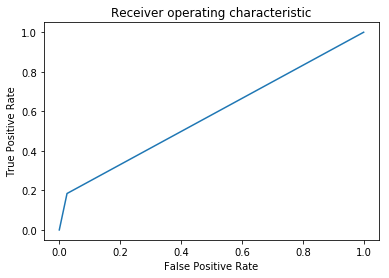

In [11]:
plt.plot(dict1[2], dict2[2])
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 6. A Precision/Recall curve

In [12]:
yScore = classfr.predict(xTest)
recall = dict()
precision = dict()
for i in range(nDiv):
    precision[i], recall[i], _ = precision_recall_curve(yTest[:, i], yScore[:, i])

Plotting the precision and recall curve

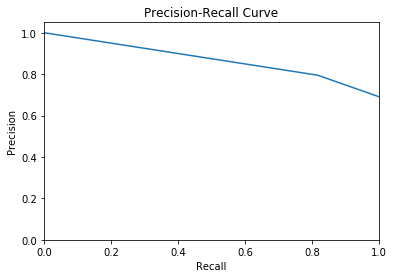

In [13]:
plt.clf()
plt.plot(recall[0], precision[0])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

We can categorize a model into 3 types, worse, better and ideal. A model that has low precision and high recall can be categorized as worse. A model that has high precision and low recall can be categorized as better. A model that has high precision and high recall can be categorized as ideal. From the above graph we can see that this model not an ideal model.